# **Implement Naive Bayes algorithm on the dataset**

**Recession Prediction**



**Team :** transformers-stock-market-prediction



**Team Members:**


Amrutha Singh Balaji Singh

Anand Muralidhara

Poorva Agarwal




Snehal Yeole



**Individual Contributions:**


1. Data Cleaning and Data pre-processing - **Poorva Agarwal (013770939)**


2. Pair Plot visualization - **Poorva Agarwal (013770939)**


3. Split the dataset into Features and Target variable - **Anand Muralidhara (013752622)**


4. Split the Features and Target variable into Training and Testing sets and calculation of shape of datasets - **Anand Muralidhara (013752622)**


5. Implement Naive Bayes Classifier - **Snehal Yeole (012548471)**


6. Calculate Accuracy and Confusion Matrix - **Snehal Yeole (012548471)**


7. Calculate Classification report - **Amrutha Singh Balaji Singh (013778583)**


8. Visualization of Confusion Matrix and Heat Map - **Amrutha Singh Balaji Singh (013778583)**



**Data Set Used:**


quarterly-nasdaq-gdp-unemp-ind-yield.csv


The dataset can be found on the common google drive under **“StockMarketPrediction-Transformers -> Datasets”** folder.


Below is the link:



https://drive.google.com/drive/u/1/folders/1qgsOPA2svJ-58u5zurF1NScUPu9ZJSEP


**DATA NARRATIVE**



**Use Case:**



* Predict the bubble formation and upcoming Recession based on factors that are major players leading to Recession



*  Retrieve the insights from the Recession dataset on market growth trend. How the market is doing? which will help people channelize their investments



**Purpose of this assignment:**



The purpose of this assignment is Naive Bayes implementation on the Recession dataset in order to classify the probability of upcoming recession in '0' and '1' classes (binary classification). Naive Bayes uses Bayes Theorem of probability for prediction of unknown class. 

Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. The features help the Naive Bayes model predict recession probability by calculating the likelihood and posterior probability given the prior probability of a particular event.


**Feature and Target Selection:**

In order to implement Naive Bayes on our 'Recession' dataset, we have split the columns in dataset into two categories:



1.   **Independent Variables (Features) :** 'NASDAQ', YIELD', 'UNEMPLOY', 'GDP', 'INDUSTRY'


2.   **Dependent Variable (Target) :**  'RECESSION'



**Observations:**




*   Pair Plot to visualize the data distribution in dataset



*   **Naive Bayes Classification observation**

    Below is the result for recession prediction on test data using Naive  Bayes classifier model
    
    
    array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])
       
    0 - Recession will not happen
   
    1 - Recession will happen
    
   
*   Number of mislabeled points out of a total 34 points : 6

    
    
*   Accuracy score for Naive Bayes model is 82.35%



*  **We are getting Classification report given below:**

                  precision  recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.57      0.57      0.57         7

    accuracy                           0.82        34
    
   macro avg       0.73      0.73      0.73        34
   
weighted avg       0.82      0.82      0.82        34



*   **Confusion Matrix:**

        [[24  3]
        [ 3  4]]



*   Visualization for Confusion matrix and Heat map




**Code snippet to mount the google drive on colab**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Mention the location of your dataset on google drive**

In [0]:
cd '/content/drive/My Drive/DataSets'

/content/drive/My Drive/DataSets


**Importing required libraries for Naive Bayes implementation**

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
#from sklearn.cross_validation import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

**Code to load the recession dataset csv file and print the first few records**

In [0]:
recession_data = pd.read_csv("/content/drive/My Drive/DataSets/quarterly-nasdaq-gdp-unemp-ind-yield.csv", sep=',', usecols=['DATE','NASDAQ','UNEMPLOY','YIELD','GDP','INDUSTRY','RECESSION'])
recession_data.head(5)

,DATE,NASDAQ,UNEMPLOY,YIELD,GDP,INDUSTRY,RECESSION
0,10/1/77,101.216508,6654.666667,-69.00365,301.148,3.287300,0
1,1/1/78,102.436452,6381.333333,-64.99132,250.297,2.183100,0
2,4/1/78,117.489531,6111.666667,-74.26246,376.704,2.710667,0
3,7/1/78,130.087143,6171.333333,-97.95441,330.983,2.632567,0
4,10/1/78,119.848413,6084.000000,-211.76856,420.103,3.244300,0


**Print entire records from recession dataset**

In [0]:
recession_data

,DATE,NASDAQ,UNEMPLOY,YIELD,GDP,INDUSTRY,RECESSION
0,10/1/77,101.216508,6654.666667,-69.00365,301.148,3.287300,0
1,1/1/78,102.436452,6381.333333,-64.99132,250.297,2.183100,0
2,4/1/78,117.489531,6111.666667,-74.26246,376.704,2.710667,0
3,7/1/78,130.087143,6171.333333,-97.95441,330.983,2.632567,0
4,10/1/78,119.848413,6084.000000,-211.76856,420.103,3.244300,0
5,1/1/79,125.492064,6130.333333,-247.49419,412.063,3.607767,0
6,4/1/79,133.444603,5956.000000,-248.25242,174.673,1.493500,1
7,7/1/79,144.743333,6168.666667,-2720.95238,158.703,0.894100,1
8,10/1/79,142.523750,6286.333333,120.02580,86.448,0.164133,1
9,1/1/80,152.525238,6704.666667,85.76788,95.787,0.155167,1


**Data Cleaning and Data Preprocessing step**

In [0]:
#Scale the values of NASDAQ, UNEMPLOY, YIELD, GDP and INDUSTRY factors

#Scale the NASDAQ values
scaler = MinMaxScaler()
scaler.fit(recession_data.NASDAQ.values.reshape(-1,1))
recession_data.NASDAQ = scaler.transform(recession_data.NASDAQ.values.reshape(-1,1))

#Scale the UNEMPLOY values
scaler = MinMaxScaler()
scaler.fit(recession_data.UNEMPLOY.values.reshape(-1,1))
recession_data.UNEMPLOY = scaler.transform(recession_data.UNEMPLOY.values.reshape(-1,1))

#Scale the YIELD values
scaler = MinMaxScaler()
scaler.fit(recession_data.YIELD.values.reshape(-1,1))
recession_data.YIELD = scaler.transform(recession_data.YIELD.values.reshape(-1,1))

#Scale the GDP values
scaler = MinMaxScaler()
scaler.fit(recession_data.GDP.values.reshape(-1,1))
recession_data.GDP = scaler.transform(recession_data.GDP.values.reshape(-1,1))

#Scale the INDUSTRY values
scaler = MinMaxScaler()
scaler.fit(recession_data.INDUSTRY.values.reshape(-1,1))
recession_data.INDUSTRY = scaler.transform(recession_data.INDUSTRY.values.reshape(-1,1))

**Print the dataset after Data Cleaning step - scaling the values of features**

In [0]:
recession_data

,DATE,NASDAQ,UNEMPLOY,YIELD,GDP,INDUSTRY,RECESSION
0,10/1/77,0.000000,0.109383,0.436097,0.718043,0.849316,0
1,1/1/78,0.000157,0.080972,0.436757,0.678327,0.799668,0
2,4/1/78,0.002093,0.052942,0.435232,0.777056,0.823389,0
3,7/1/78,0.003713,0.059144,0.431336,0.741346,0.819877,0
4,10/1/78,0.002396,0.050066,0.412620,0.810952,0.847382,0
5,1/1/79,0.003122,0.054882,0.406745,0.804673,0.863725,0
6,4/1/79,0.004145,0.036761,0.406621,0.619261,0.768661,1
7,7/1/79,0.005598,0.058866,0.000000,0.606788,0.741711,1
8,10/1/79,0.005313,0.071097,0.467182,0.550353,0.708889,1
9,1/1/80,0.006599,0.114580,0.461548,0.557648,0.708486,1


**Print the shape of dataset**

In [0]:
recession_data.shape

(167, 7)

**Pair Plot to visualize the data distribution in the data set**

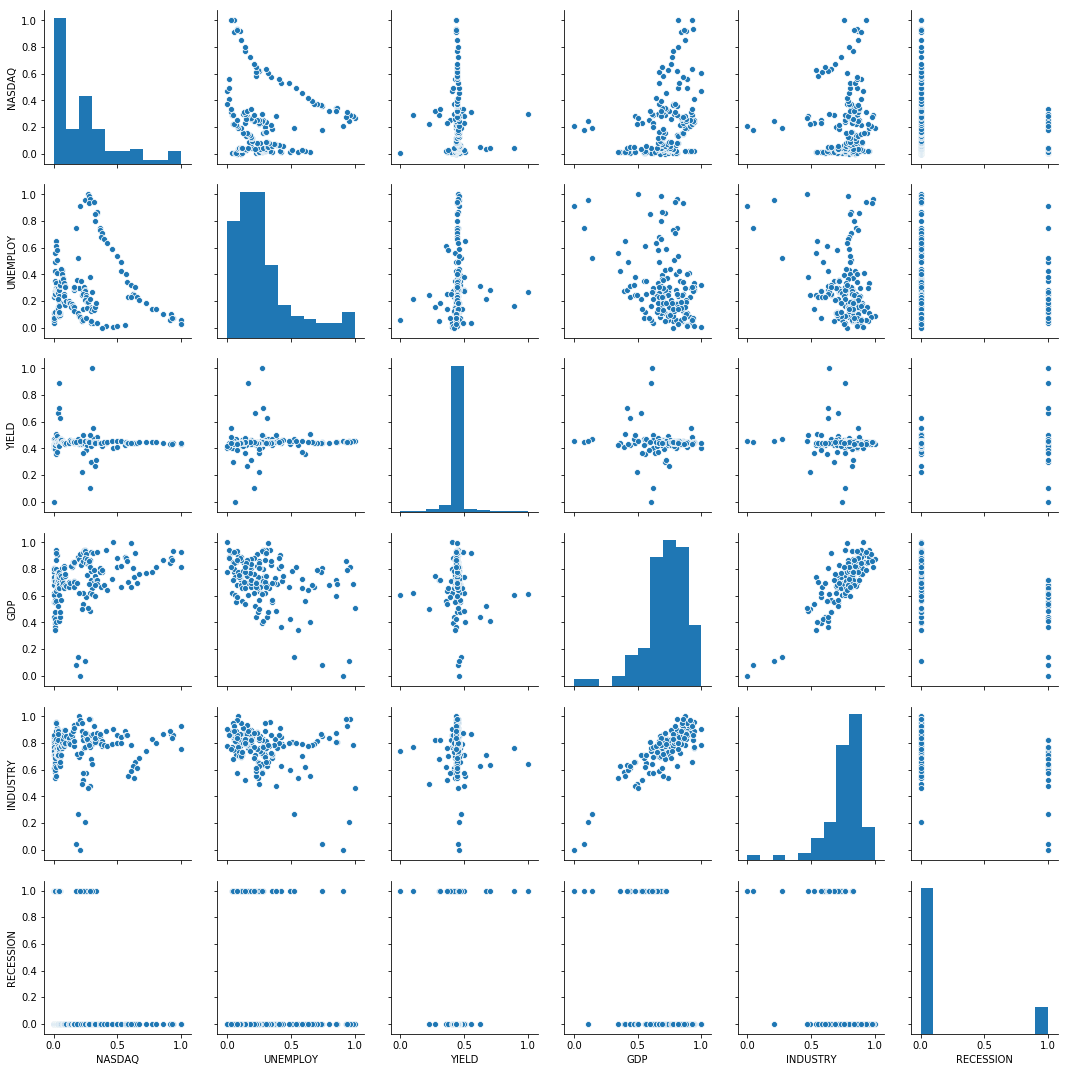

In [0]:
#Pair Plot to visualize how the data is distributed in dataset
pair_plot = sns.pairplot(recession_data)

**Split the dataset into Training set and Testing set**

**Step 1:** divide the dataset into two categories: Features (Independent variables) and Target variable (dependent variable)

**Features**

In [0]:
#Drop the columns DATE and RECESSION
features = recession_data.drop(['DATE','RECESSION'],axis='columns')
features

,NASDAQ,UNEMPLOY,YIELD,GDP,INDUSTRY
0,0.000000,0.109383,0.436097,0.718043,0.849316
1,0.000157,0.080972,0.436757,0.678327,0.799668
2,0.002093,0.052942,0.435232,0.777056,0.823389
3,0.003713,0.059144,0.431336,0.741346,0.819877
4,0.002396,0.050066,0.412620,0.810952,0.847382
5,0.003122,0.054882,0.406745,0.804673,0.863725
6,0.004145,0.036761,0.406621,0.619261,0.768661
7,0.005598,0.058866,0.000000,0.606788,0.741711
8,0.005313,0.071097,0.467182,0.550353,0.708889
9,0.006599,0.114580,0.461548,0.557648,0.708486


**Target Variable**

In [0]:
target = recession_data['RECESSION']
target

0      0
1      0
2      0
3      0
4      0
5      0
6      1
7      1
8      1
9      1
10     1
11     0
12     0
13     0
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
137    0
138    0
139    0
140    0
141    0
142    0
143    0
144    0
145    0
146    0
147    0
148    0
149    0
150    0
151    0
152    0
153    0
154    0
155    0
156    0
157    0
158    0
159    0
160    0
161    0
162    0
163    0
164    0
165    0
166    0
Name: RECESSION, Length: 167, dtype: int64

**Step 2:** Split the Features and Target variable into Training and Testing sets

In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Split the faetures and target variable in the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

**Step 3:** Calculate the shape of Training and Testing sets

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(133, 5)
(133,)
(34, 5)
(34,)


**Implement Naive Bayes Classifier**

**Step 1:** Generate and Train the Naive Bayes model

In [0]:
#Create an instance of Gaussian Classifier 
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

**Step 2:** Predict the probability of upcoming recession on test dataset

In [0]:
#Predict the probability of upcoming recession on test dataset
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

**Step 3:** Calculate the number of mislabeled points out of total points

In [0]:
print("Number of mislabeled points out of a total %d points : %d"       
     % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 34 points : 6


**Step 4:** Calculate the accuracy score using actual and predicted values

In [0]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8235294117647058


**Calculate the Classification Report and Confusion Matrix**

**Classification Report**

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.57      0.57      0.57         7

    accuracy                           0.82        34
   macro avg       0.73      0.73      0.73        34
weighted avg       0.82      0.82      0.82        34



**Confusion Matrix**

In [0]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n')
print(confusion)

Confusion Matrix:

[[24  3]
 [ 3  4]]


**Plot the Confusion Matrix for Naive Bayes**

In [0]:
#Python function to plot the Confusion Matrix
def plot_confusion_matrix(confusion, title='Confusion matrix', cmap='Pastel1'):
    plt.figure(figsize=(9,9))
    plt.imshow(confusion, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 15)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["0", "1"], rotation=45, size = 10)
    plt.yticks(tick_marks, ["0", "1"], size = 10)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    width, height = confusion.shape

    for x in np.arange(width):
        for y in np.arange(height):
            plt.annotate(str(confusion[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')

<Figure size 432x288 with 0 Axes>

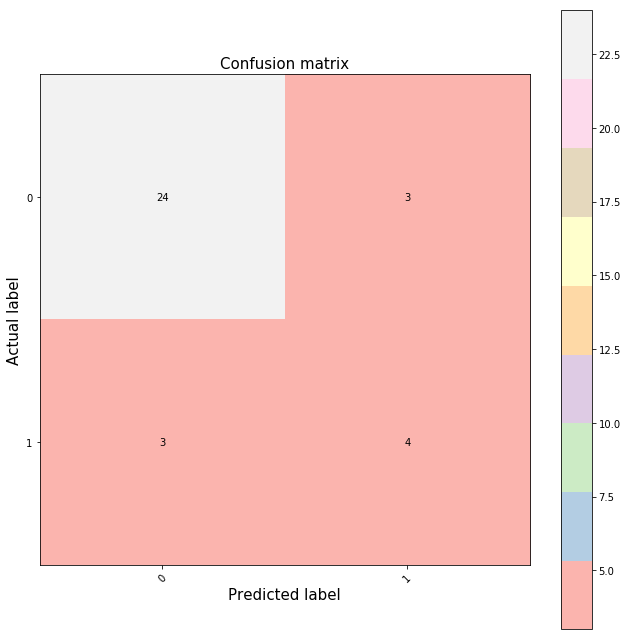

In [0]:
plt.figure()
plot_confusion_matrix(confusion);
plt.show();

In [0]:
cm_normalized = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

**Plot the Heat Map for Naive Bayes**

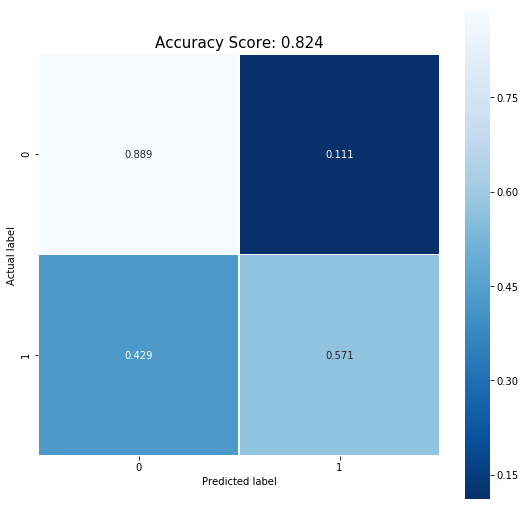

In [0]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(accuracy_score(y_test,y_pred)) 
plt.title(all_sample_title, size = 15);

## **References**

https://www.youtube.com/watch?v=vz_xuxYS2PM


https://www.edureka.co/blog/naive-bayes-tutorial/#sklearn


https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn